In [2]:
import pandas as pd
import numpy as np

# Load the EV charging sessions dataset
df = pd.read_csv('ev_charging_sessions.csv')

print("EV Charging Sessions Dataset Loaded Successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 records:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

EV Charging Sessions Dataset Loaded Successfully!

Dataset shape: (3500, 10)
Columns: ['session_id', 'user_id', 'vehicle_id', 'station_id', 'start_time', 'end_time', 'duration_min', 'energy_kWh', 'session_day', 'session_type']

First 5 records:
  session_id user_id vehicle_id station_id           start_time  \
0     CS0001    U339       V347       S091  2024-11-11 12:09:00   
1     CS0002    U286       V463       S025  2024-11-10 19:51:00   
2     CS0003    U092       V419       S007  2024-11-26 18:46:00   
3     CS0004    U369       V070       S008  2024-11-28 19:53:00   
4     CS0005    U185       V298       S037  2024-11-27 13:09:00   

              end_time  duration_min  energy_kWh session_day session_type  
0  2024-11-11 13:26:00            77       26.87     Weekday   Occasional  
1  2024-11-10 21:28:00            97       67.47     Weekend    Emergency  
2  2024-11-26 20:43:00           117       60.16     Weekend      Regular  
3  2024-11-28 21:42:00           109       39.19

In [3]:
df.columns

Index(['session_id', 'user_id', 'vehicle_id', 'station_id', 'start_time',
       'end_time', 'duration_min', 'energy_kWh', 'session_day',
       'session_type'],
      dtype='object')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: cleaner theme
sns.set(style="whitegrid")

# ---------------------------
# Convert datetime columns
# ---------------------------
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['hour'] = df['start_time'].dt.hour
df['date'] = df['start_time'].dt.date

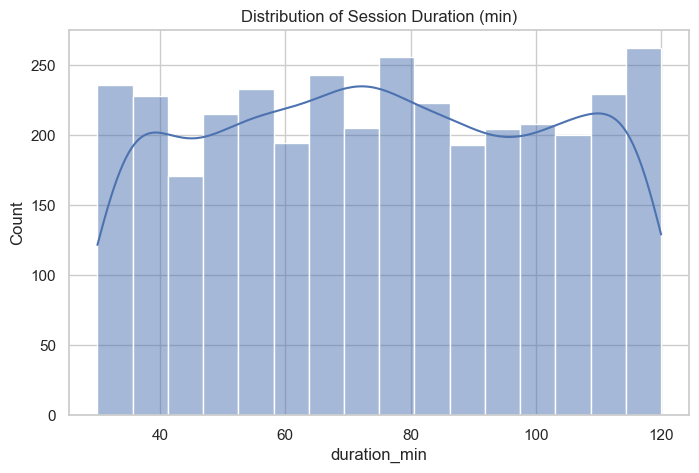

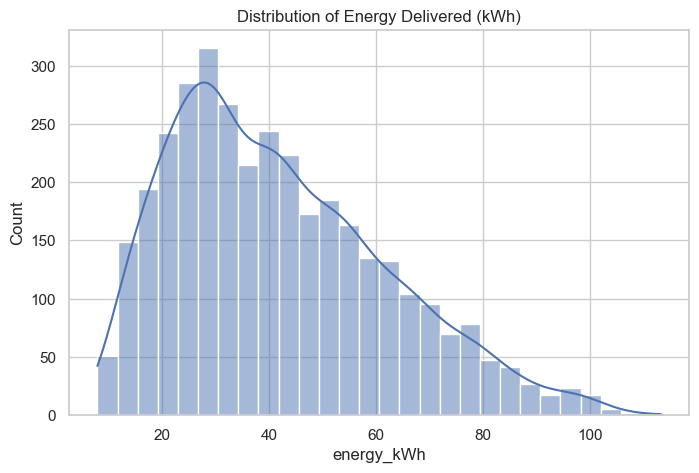

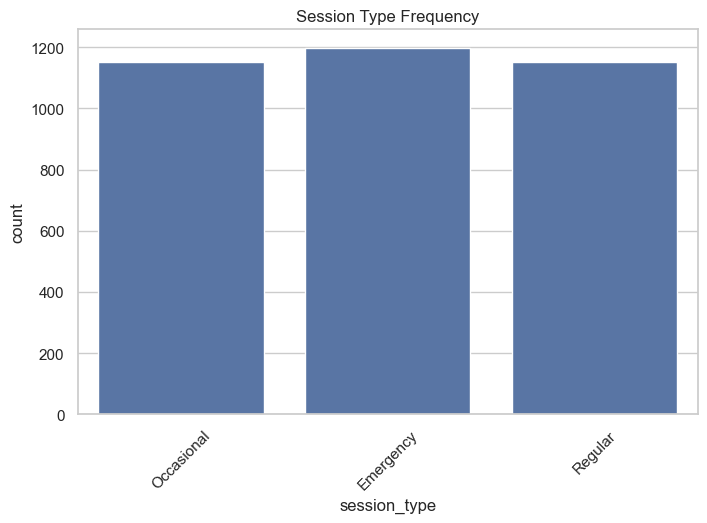

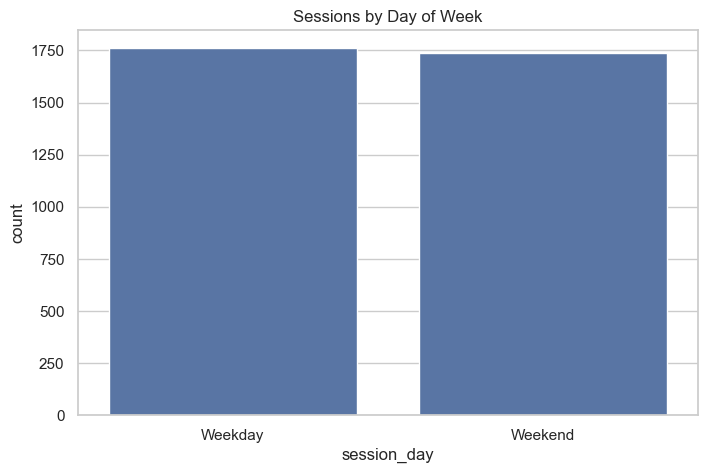

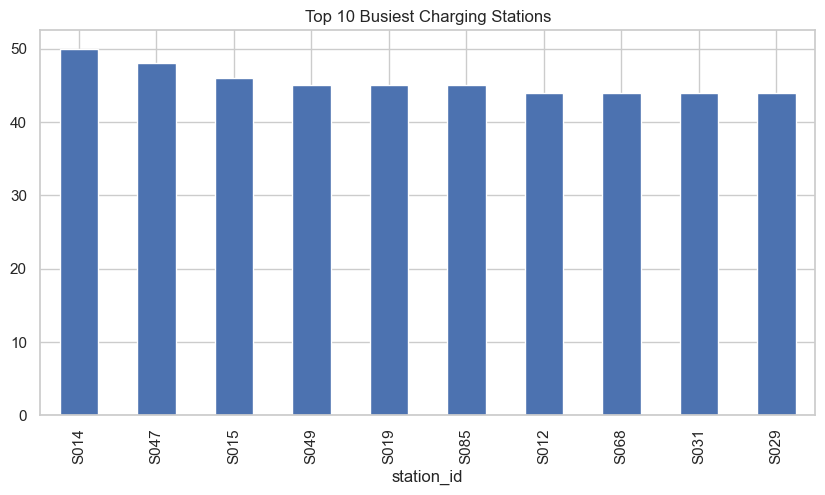

In [6]:

# =====================================================
# 1. UNIVARIATE DISTRIBUTIONS
# =====================================================

# Duration distribution
plt.figure(figsize=(8,5))
sns.histplot(df['duration_min'], kde=True)
plt.title("Distribution of Session Duration (min)")
plt.show()

# Energy distribution
plt.figure(figsize=(8,5))
sns.histplot(df['energy_kWh'], kde=True)
plt.title("Distribution of Energy Delivered (kWh)")
plt.show()

# Session type frequency
plt.figure(figsize=(8,5))
sns.countplot(x='session_type', data=df)
plt.title("Session Type Frequency")
plt.xticks(rotation=45)
plt.show()

# Sessions per day of week
plt.figure(figsize=(8,5))
sns.countplot(x='session_day', data=df,
              order=['Weekday','Weekend'])
plt.title("Sessions by Day of Week")
plt.show()

# Top 10 busiest stations
plt.figure(figsize=(10,5))
df['station_id'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Busiest Charging Stations")
plt.show()

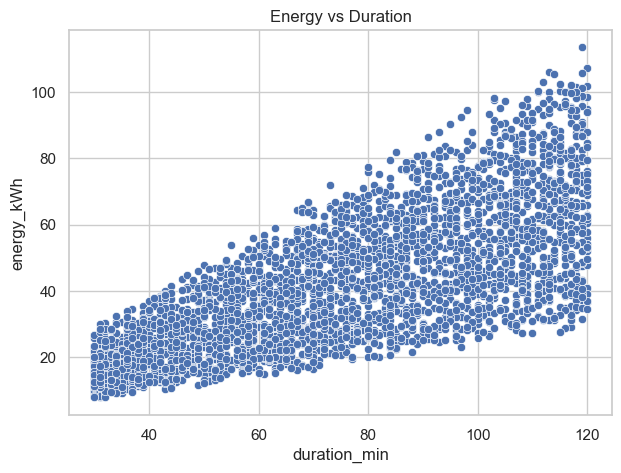

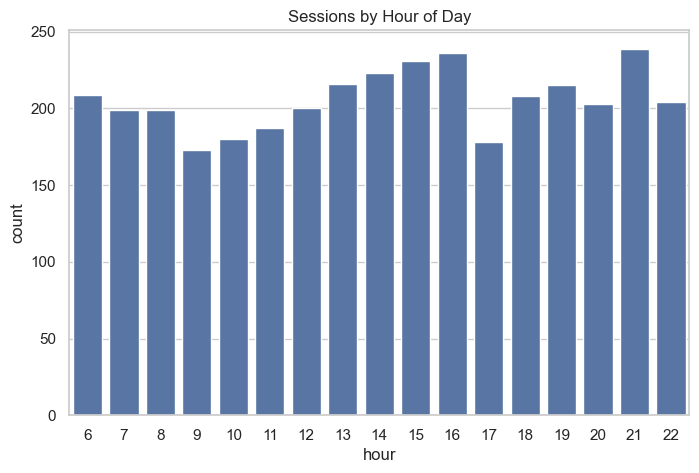

c:\Users\bvhaw\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\bvhaw\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


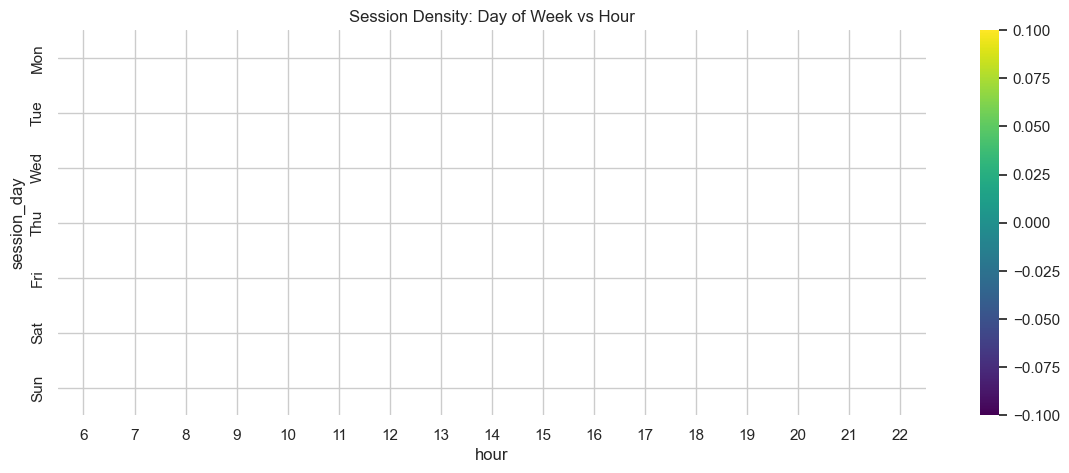

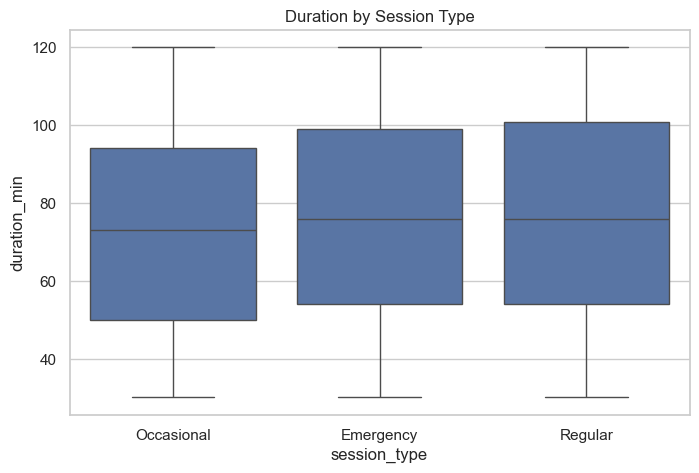

In [7]:
# =====================================================
# 2. BIVARIATE RELATIONSHIPS
# =====================================================

# Duration vs Energy
plt.figure(figsize=(7,5))
sns.scatterplot(x='duration_min', y='energy_kWh', data=df)
plt.title("Energy vs Duration")
plt.show()

# Hourly usage
plt.figure(figsize=(8,5))
sns.countplot(x='hour', data=df)
plt.title("Sessions by Hour of Day")
plt.show()

# Heatmap: Day of week vs hour
pivot = df.pivot_table(index='session_day', columns='hour', values='session_id', aggfunc='count')
pivot = pivot.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])  # consistent order

plt.figure(figsize=(14,5))
sns.heatmap(pivot, cmap="viridis")
plt.title("Session Density: Day of Week vs Hour")
plt.show()

# Boxplot: duration by session type
plt.figure(figsize=(8,5))
sns.boxplot(x='session_type', y='duration_min', data=df)
plt.title("Duration by Session Type")
plt.show()

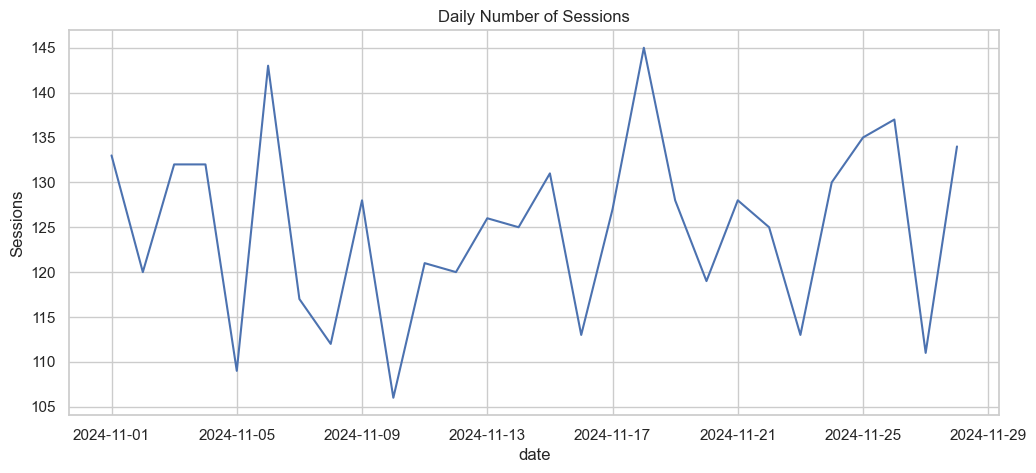

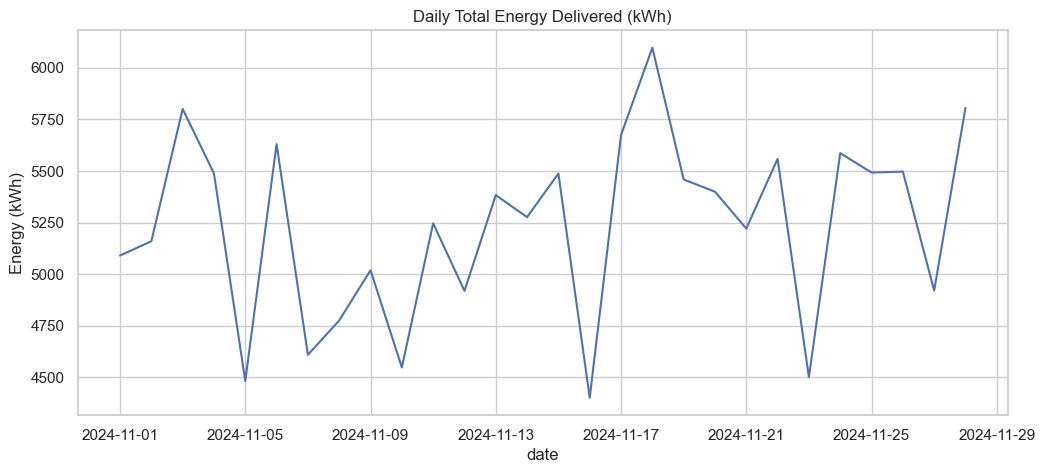

In [8]:
# =====================================================
# 3. TIME SERIES
# =====================================================

# Daily total sessions
daily_counts = df.groupby('date')['session_id'].count()

plt.figure(figsize=(12,5))
daily_counts.plot()
plt.title("Daily Number of Sessions")
plt.ylabel("Sessions")
plt.show()

# Daily total energy
daily_energy = df.groupby('date')['energy_kWh'].sum()

plt.figure(figsize=(12,5))
daily_energy.plot()
plt.title("Daily Total Energy Delivered (kWh)")
plt.ylabel("Energy (kWh)")
plt.show()

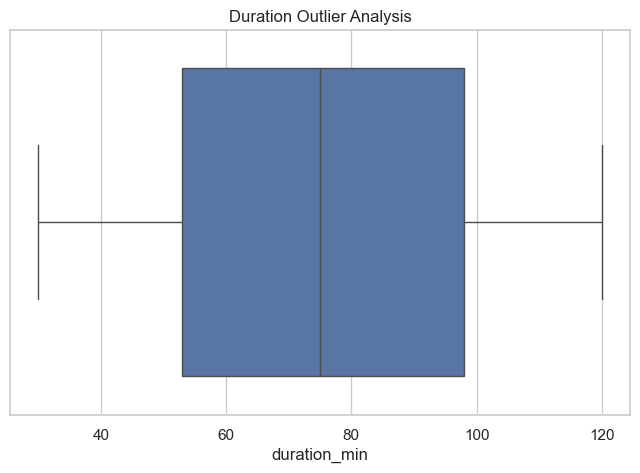

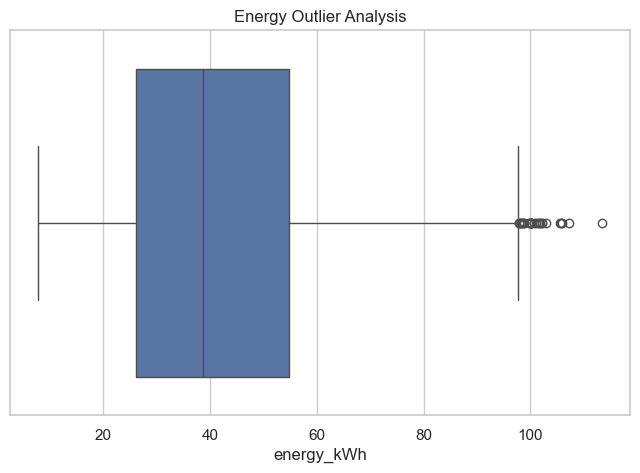

In [9]:
# =====================================================
# 4. OUTLIER CHECKS
# =====================================================

plt.figure(figsize=(8,5))
sns.boxplot(x=df['duration_min'])
plt.title("Duration Outlier Analysis")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['energy_kWh'])
plt.title("Energy Outlier Analysis")
plt.show()